## Loading basic dependencies

# Introduction to AR model :
* AutoRegressive model predicts future behaviour based on past behaviour
* It is used when there is some correlation b/w values in a time series and the values that preceds and succed them
* In Autoregression we use a regression model to formulate a time series problem. we make linear combination of past observations and use them to forcast future observations
### Working of AR Models
* We need to forcast a variable called t.
* we need past observations such as yt-1,y-2,yt-3..etc
##### The fundamental assumptions of Autoregressive Model:
* 1.Stationarity
* where as non-stationary we need to convert into stationary
* 2.AutoCorrelation

## 1.Stationarity
* Stationarity means that the statistical properties of a process generating a time series do not change over time
### The Statistical properties are 
* Mean
* Variance
* Covariance
* These remain same irrespective of the time at which you observe

### Why Stationarity is important?
* Stationary processes are easier to analyze and model beacuse their statical properties do not change over time
* If the statistical propertises are not constant over time then it is said to be a "Non-Stationary" time series.

### How to check Stationarity?
* There are two popular statical tests using which we can stationarity of a time series
### 1.Augmented Dickey-Fuller(ADF) test
* Null Hypothesis: The time series not stationary
* Alternate Hypothesis : The time series is statonary
### 2.Kwiatkowski-Phillips-Schmid-Shin(KPSS)test
* Null Hypothesis : The time series is statonary
* Alternate Hypothesis : The time series is not statonary

In [1]:
#loading basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
#loading the data
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#shape of the data
data.shape

(144, 1)

## Missing Values

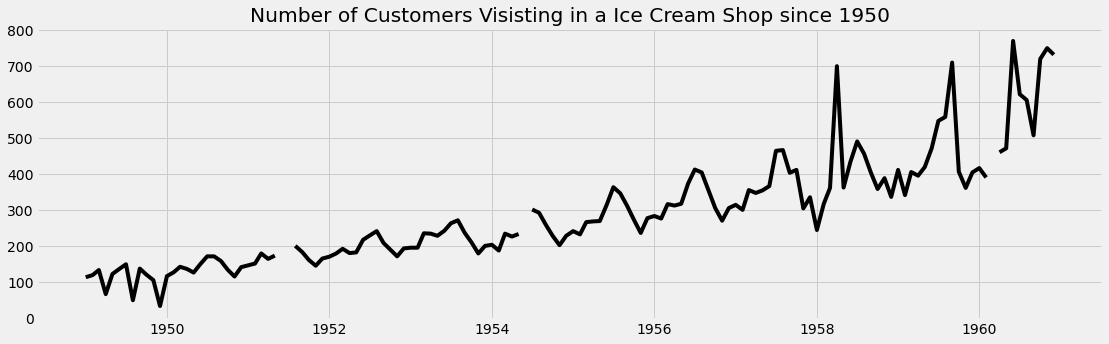

In [3]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## Linear Interpolation

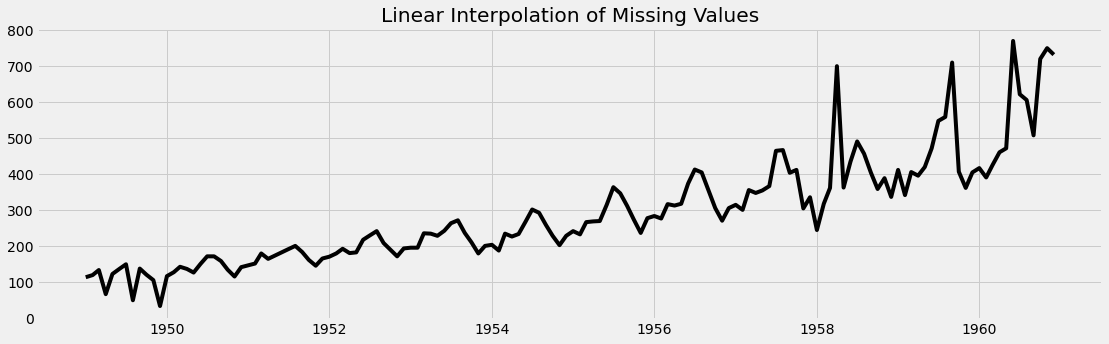

In [4]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

# Stationarity
Stationarity means that the statistical properties of a process generating a time series do not change over time. The statistical properties are Mean, variance and covariance which are same irrespective of the time at which you observe them.

Stationarity is an important concept as stationary processes are easier to analyze and model because their statistical properties do not change over time.



In [5]:
#getting statistical information
data.describe()

,Customers,Customers_linear
count,140.000000,144.000000
mean,291.878571,291.194444
std,150.040592,148.877256
min,34.000000,34.000000
25%,180.000000,180.750000
50%,265.500000,265.500000
75%,364.750000,364.750000
max,770.000000,770.000000


# Augmented Dickey-Fuller Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers_linear'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.9806738090828984
n_lags: 14
p-value: 1.0
Critial Values:
   1%, -3.482087964046026
Critial Values:
   5%, -2.8842185101614626
Critial Values:
   10%, -2.578864381347275


* p-value is 1 and its value is larger than 0.05 , hence 
it fails to reject the null hypothesis. Hence, the data has a unit root and is non-stationary

* The mean value is not stationary.
* The variance is fluctating over time.

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05

Alternate Hypothesis: The series is not stationary when p-value <= 0.5

In [7]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers_linear'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 1.0606088884543792
p-value: 0.01
num lags: 14
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
